## Objective

To build a model to classify a piece of new as REAL or FAKE.

## Methodology

- First, we will use scikit-learn and build a TfidfVectorizer on our dataset
- Then, we initialize a PassiveAggressive Classifier and fit the model
- Finally, we will use Accuracy as a metric and the confusion matrix to evaluate the performance of the classifier

## Knowledge required

- Fake news
- TfidfVectorizer
- PassiveAggressive Classifier

## What is fake news?

Fake news refers to the spread of misinformation or hoaxes presented as real news. It can take various forms, such as fabricated articles, misleading headlines, manipulated images or videos, or conspiracies disguised as legitimate news. Fake news is often spread through social media, online news websites, or messaging apps, and can have serious real-world consequences, such as influencing public opinion, affecting stock prices, or inciting violence. It is important to be critical of the news that one consumes and to verify the authenticity of the information before sharing it.

## What is TfidfVectorizer?

TfidfVectorizer is a class in the Python scikit-learn library that is used to convert text documents into numerical feature vectors. It is a combination of two techniques: term frequency-inverse document frequency (TF-IDF) and vectorization.

Term frequency (TF) is a measure of how frequently a term (word or phrase) occurs in a document. It can be calculated as the number of times the term appears in the document, divided by the total number of terms in the document.

Inverse document frequency (IDF) is a measure of how important a term is to a document in a collection or corpus (collection of texts). It can be calculated as the logarithm of the total number of documents in the corpus, divided by the number of documents in which the term appears.

TF-IDF is the product of TF and IDF, and it is used to weigh the importance of a term in a document. The higher the TF-IDF score, the more important the term is to the document.

Tf-idf formula:

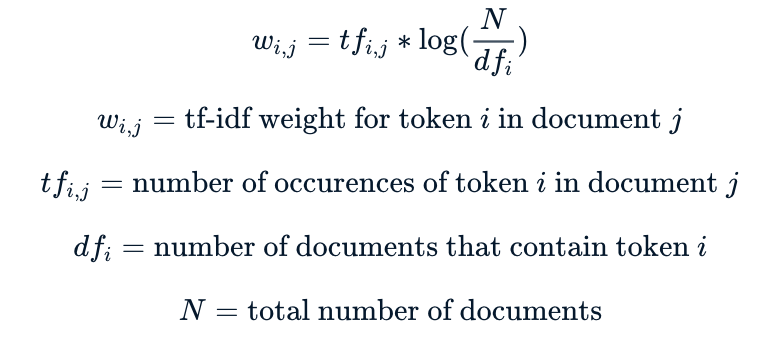

Vectorization is the process of encoding text as numerical feature vectors. TfidfVectorizer converts a collection of text documents into a matrix of TF-IDF features, which can then be used as input to a machine learning model or other natural language processing (NLP) tools.

In summary, TfidfVectorizer is a tool that converts text documents into numerical vectors, using TF-IDF as the underlying weighting scheme. It is often used as a preprocessing step in NLP tasks such as text classification, clustering, and information retrieval.

## What is PassiveAggressive Classifier?

The Passive Aggressive (PA) algorithm is a linear classifier that can be used for online learning, where the model updates its predictions based on new data instances incrementally. It is well suited for large-scale and high-dimensional datasets, and can be used for both binary and multiclass classification.

The PA classifier is named after the "passive-aggressive" behavior of the algorithm, which can be seen in the way it updates the model's prediction based on the error of the previous prediction. If the error is small, the model becomes "passive" and makes a small update to its prediction. If the error is large, the model becomes "aggressive" and makes a larger update. This behavior allows the model to adapt quickly to new data while avoiding overfitting.

The PA classifier is implemented in the scikit-learn library in Python as the PassiveAggressiveClassifier class. It has several hyperparameters that can be tuned to control the model's behavior, such as the loss function, the regularization strength, and the learning rate.

## Dataset

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
news = pd.read_csv('/Users/brindhamanivannan/Downloads/news.csv')

# Show the first 5 rows of the DataFrame
news.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
news.shape

(6335, 4)

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


## About Dataset

- The first column identifies the news 
- The second column is the title
- The third column is the text
- The fourth column has labels denoting whether the news is REAL or FAKE

In [5]:
# Import all the required libraries

import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# First 10 rows of the dataset
news.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [7]:
# Get the no.of rows and columns
news.shape

(6335, 4)

In [9]:
# Get the labels
labels = news.label
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [10]:
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [11]:
news['text'].head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [13]:
news['label'].head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [14]:
# The train_test_split() function from scikit-learn's model selection module is used to split the data into training and testing sets
# The test_size parameter specifies the proportion of the data to be used for testing
# The random_state parameter specifies the random seed to use for the data shuffle before the split

import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into features and labels
X = news['text'] # feature
y = news['label'] # label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [15]:
X_train.head()

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
Name: text, dtype: object

In [19]:
X_train.shape

(5068,)

In [16]:
X_test.head()

3534    A day after the candidates squared off in a fi...
6265    VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...
3123    It's debate season, where social media has bro...
3940    Mitch McConnell has decided to wager the Repub...
2856    Donald Trump, the actual Republican candidate ...
Name: text, dtype: object

In [20]:
X_test.shape

(1267,)

In [17]:
y_train.head()

6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
Name: label, dtype: object

In [22]:
y_train.shape

(5068,)

In [18]:
y_test.head()

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
Name: label, dtype: object

In [23]:
y_test.shape

(1267,)

In [24]:
# Initialize a TfidfVectorizer 
# max_df - maximum document frequency 
# TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) # terms with a higher document frequency will be discarded
tfidf_vectorizer


TfidfVectorizer(max_df=0.7, stop_words='english')

In [25]:
type(tfidf_vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [26]:
# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [27]:
type(tfidf_train)

scipy.sparse._csr.csr_matrix

In [28]:
type(tfidf_test)

scipy.sparse._csr.csr_matrix

In [29]:
tfidf_train

<5068x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 1337098 stored elements in Compressed Sparse Row format>

In [30]:
tfidf_test

<1267x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 322056 stored elements in Compressed Sparse Row format>

In [31]:
# Initialize a PassiveAggressiveClassifier; we’ll fit this on tfidf_train and y_train

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [32]:
# Predict on the test set

y_pred = pac.predict(tfidf_test)
y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [33]:
# Calculate accuracy

score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.5%


We got an accuracy of 92.5% with this model.

In [34]:
# Build confusion matrix

confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 45, 584]])

With this model, we have 588 true positives, 584 true negatives, 45 false positives, and 50 false negatives.

## Conclusion

We took a political dataset news.csv, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up with an accuracy of 92.5%.